In [124]:
# Initialize Otter
import otter
grader = otter.Notebook("hw4.ipynb")

---

<h1><center>SDSE Homework 4<br><br> Simple linear regression </center></h1>

---

In [125]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pickle
import pandas as pd
from resources.hashutils import *

# 0. Load the data

In this homework we will implement simple linear regression and apply it to four different datasets. 

All of the formulas can be found in the lecture and reader. 

The four datasets are contained in `hw3data.pickle`. Each dataset is a tuple with entries `x` and `y`:  `DA = (x,y)`.

In [126]:
with open('resources/hw4data.pickle','rb') as f:
    DA, DB, DC, DD = pickle.load(f)

# 1. Scatter plots

Display each of the four datasets using matplotlib [scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) plots. Your plot should look similar to the one below, with two rows and two columns of plots.  

<img src="resources/f1.png" />

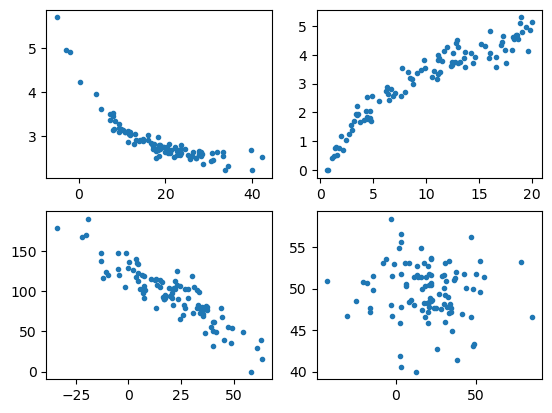

In [127]:
fig, ax = plt.subplots(nrows=2,ncols=2)
ax[0,0].scatter(DA[0],DA[1],marker='.')
ax[0,1].scatter(DB[0],DB[1],marker='.')
ax[1,0].scatter(DC[0],DC[1],marker='.')
ax[1,1].scatter(DD[0],DD[1],marker='.')

# 2. Sample correlation coefficient

Implement the function `corr(D)` that takes a dataset tuple `D` and returns its sample correlation coefficient $r$. 

In [128]:
def corr(D):
    x, y = D
    sm_x = x.mean()
    sm_y = y.mean()
    r = (((x-sm_x)*(y-sm_y)).sum())/(np.sqrt(((x-sm_x)**2).sum())*np.sqrt(((y-sm_y)**2).sum()))
    return r

In [129]:
rA = corr(DA)
rB = corr(DB)
rC = corr(DC)
rD = corr(DD)

print(f'rA={rA}')
print(f'rB={rB}')
print(f'rC={rC}')
print(f'rD={rD}')

rA=-0.8099147715792737
rB=0.938583470794401
rC=-0.901091501635049
rD=-0.08311748917950815


In [130]:
grader.check("q2")

q2 results: All test cases passed!

# 3. Compute linear regresssion coefficients

Implement the function `compute_linear_regression(D)` that takes a dataset tuple `D` and returns the coefficients of the linear regression $\theta_0$ and $\theta_1$. 

In [131]:
def compute_linear_regression(D):
    x, y = D
    
    muhatX = x.mean(axis=0)
    muhatY = y.mean(axis=0)
        
    thetahat1 = (((x-muhatX)*(y-muhatY)).sum())/(((x-muhatX)**2).sum())
    thetahat0 = muhatY - muhatX*thetahat1
    return thetahat0, thetahat1

In [132]:
thetahatA = compute_linear_regression(DA)
thetahatB = compute_linear_regression(DB)
thetahatC = compute_linear_regression(DC)
thetahatD = compute_linear_regression(DD)

print(f'A: {thetahatA}')
print(f'B: {thetahatB}')
print(f'C: {thetahatC}')
print(f'D: {thetahatD}')

A: (3.749057503898907, -0.0462178161454909)
B: (0.9678247739262225, 0.21205965956389664)
C: (127.14629626815378, -1.5443047558209406)
D: (49.898312434885575, -0.013256989456468088)


In [133]:
grader.check("q3")

q3 results: All test cases passed!

# 4. Evaluate linear regresssion prediction

Implement the function `eval_linreg(theta,D)` that takes parameters $\hat\theta=(\hat\theta_0,\hat\theta_1)$ and the dataset `D=(x,y)` and returns the array of predictions $\hat{y}$ for the training data: 
$$\hat{y} = \hat\theta_0 + x \hat\theta_1$$

In [134]:
def eval_linreg(thetahat,D):
    x, y = D
    thetahat0, thetahat1 = thetahat
    y_hat = thetahat0 + x*thetahat1
    return y_hat

In [135]:
yhatA = eval_linreg(thetahatA,DA)
yhatB = eval_linreg(thetahatB,DB)
yhatC = eval_linreg(thetahatC,DC)
yhatD = eval_linreg(thetahatD,DD)

print(f'yhatA[:20:3]={yhatA[:20:3]}')
print(f'yhatB[:20:3]={yhatB[:20:3]}')
print(f'yhatC[:20:3]={yhatC[:20:3]}')
print(f'yhatD[:20:3]={yhatD[:20:3]}')

yhatA[:20:3]=[3.98923839 3.73908805 3.4193214  3.39071521 3.36528081 3.31764243
 3.26114505]
yhatB[:20:3]=[1.10744508 1.2380595  1.29750078 1.42506595 1.59110387 1.67990742
 1.71890906]
yhatC[:20:3]=[179.72584278 156.97516769 145.60977061 134.87236202 129.92229685
 126.71703594 121.67884977]
yhatD[:20:3]=[50.46531219 50.17274557 50.10828722 50.00413843 49.93722651 49.91523581
 49.86076567]


In [136]:
grader.check("q4")

q4 results: All test cases passed!

# 5. Plot linear regresssion prediction

Overlay the linear regression lines on each one of the scatter plots. Your plot should look like this:

<img src="resources/f2.png" />

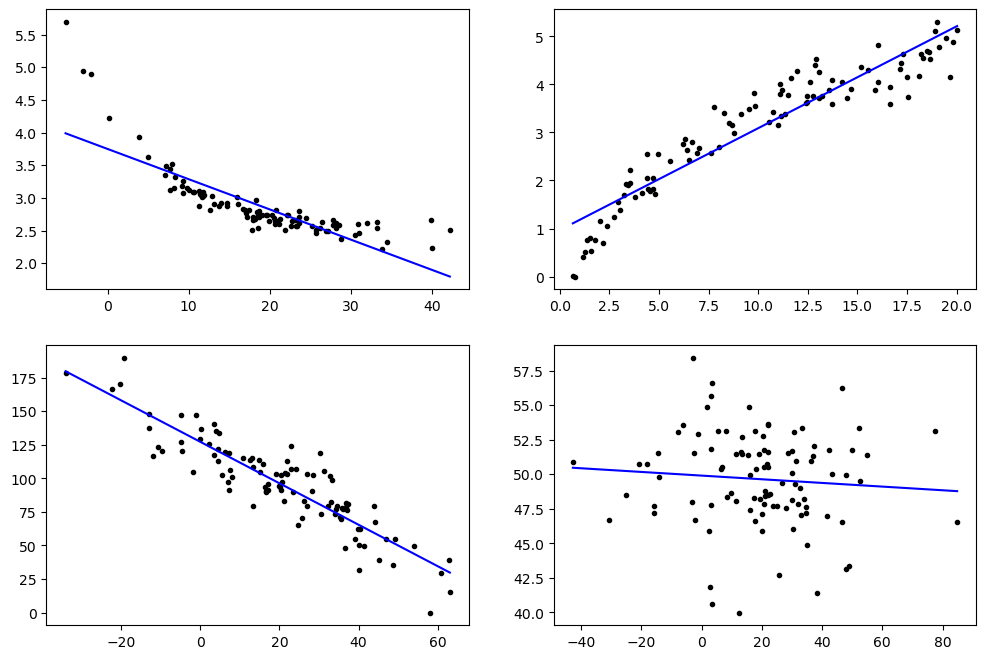

In [137]:
fig, ax = plt.subplots(figsize=(12,8),nrows=2,ncols=2)
ax[0,0].scatter(DA[0],DA[1],color='k',marker='.')
ax[0,0].plot(DA[0],yhatA,color="blue")
ax[0,1].scatter(DB[0],DB[1],color='k',marker='.')
ax[0,1].plot(DB[0],yhatB,color="blue")
ax[1,0].scatter(DC[0],DC[1],color='k',marker='.')
ax[1,0].plot(DC[0],yhatC,color="blue")
ax[1,1].scatter(DD[0],DD[1],color='k',marker='.')
ax[1,1].plot(DD[0],yhatD,color="blue")
#...

# 6. Coefficient of determinination

Implement the function `eval_Rsquared(theta,D)` that takes parameters $\hat\theta=(\hat\theta_0,\hat\theta_1)$ and the dataset `D` and returns the coefficient of determination $R^2$. Verify the identity $R^2=r^2$


In [138]:
def eval_Rsquared(thetahat,D):
    x, y = D
    return 1 - (((y-eval_linreg(thetahat,D))**2).sum() / ((y-y.mean())**2).sum())

In [139]:
RsquaredA = eval_Rsquared(thetahatA,DA)
RsquaredB = eval_Rsquared(thetahatB,DB)
RsquaredC = eval_Rsquared(thetahatC,DC)
RsquaredD = eval_Rsquared(thetahatD,DD)

print(f'RsquaredA={RsquaredA}')
print(f'RsquaredB={RsquaredB}')
print(f'RsquaredC={RsquaredC}')
print(f'RsquaredD={RsquaredD}')

RsquaredA=0.6559619372223071
RsquaredB=0.8809389316484644
RsquaredC=0.8119658943189078
RsquaredD=0.006908517007505277


In [140]:
grader.check("q6")

q6 results: All test cases passed!

# 7. Estimate $\sigma^2$

Implement the function `estimate_sigma2(theta,D)` that takes parameters $\hat\theta=(\hat\theta_0,\hat\theta_1)$ and the dataset `D` and returns an unbiased estimate of the variance $\sigma^2$ of the uncertainty values $\varepsilon_i$ in $y_i=\theta_0 + x_i\theta_1  + \varepsilon_i$. 

$$\hat\sigma^2  = \frac{1}{N-2} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2$$

In [141]:
def estimate_sigma2(thetahat,D):
    x, y = D
    return (1/(len(y)-2))*((y-eval_linreg(thetahat,D))**2).sum()

In [142]:
sigma2hatA = estimate_sigma2(thetahatA,DA)
sigma2hatB = estimate_sigma2(thetahatB,DB)
sigma2hatC = estimate_sigma2(thetahatC,DC)
sigma2hatD = estimate_sigma2(thetahatD,DD)

print(f'sigma2A={sigma2hatA}')
print(f'sigma2B={sigma2hatB}')
print(f'sigma2C={sigma2hatC}')
print(f'sigma2D={sigma2hatD}')

sigma2A=0.09628829214622489
sigma2B=0.2082814866175884
sigma2C=218.80072616698286
sigma2D=11.604657865691147


In [143]:
grader.check("q7")

q7 results: All test cases passed!

# 8. Uncertainty in the linear regression coefficients

Implement the function `estimate_sigma2(theta,D)` that takes parameters $\hat\theta=(\hat\theta_0,\hat\theta_1)$ and the dataset `D` and returns the variance associated with the linear regression parameter estimates $Var[\hat\Theta_0]$ and $Var[\hat\Theta_1]$.

In [144]:
def compute_var_param(thetahat,D):
    x, y = D
    sigma2 = estimate_sigma2(thetahat, D)
    N = len(x)
    
    var1 = sigma2 / np.sum((x - x.mean()) ** 2)
    var0 = sigma2 * (1 / N + (x.mean() ** 2) / np.sum((x - x.mean()) ** 2))
    return var0, var1

In [145]:
varA = compute_var_param(thetahatA,DA)
varB = compute_var_param(thetahatB,DB)
varC = compute_var_param(thetahatC,DC)
varD = compute_var_param(thetahatD,DD)

print(f'A: {varA}')
print(f'B: {varB}')
print(f'C: {varC}')
print(f'D: {varD}')

A: (0.004944706915203483, 1.143195797652658e-05)
B: (0.008480394564633837, 6.201746581241882e-05)
C: (4.5691174071390455, 0.005635582130422289)
D: (0.21272847310590542, 0.00025779124994615524)


In [146]:
grader.check("q8")

q8 results: All test cases passed!

# 9. Confidence intervals

Implement the function `compute_rho(theta,D,gamma)` that takes parameters $\hat\theta=(\hat\theta_0,\hat\theta_1)$, the dataset `D`, and a confidence level $\gamma$, and returns the radiuses $\rho_0$ and $\rho_1$ of the $\gamma$-confidence intervals for $\theta_0$ and $\theta_1$ respectively. 

In [171]:
def compute_rho(thetahat,D,gamma):
    x, y = D
    v0, v1 = compute_var_param(thetahat,D)
    t_crit = stats.norm.ppf(1 - (1 - gamma) / 2)
    rho0 = (v0**0.5)*t_crit
    rho1 = (v1**0.5)*t_crit
    return rho0, rho1

In [172]:
gamma = 0.98
rhoA = compute_rho(thetahatA,DA,gamma)
rhoB = compute_rho(thetahatB,DB,gamma)
rhoC = compute_rho(thetahatC,DC,gamma)
rhoD = compute_rho(thetahatD,DD,gamma)

print(f'rhoA={rhoA}')
print(f'rhoB={rhoB}')
print(f'rhoC={rhoC}')
print(f'rhoD={rhoD}')

rhoA=(0.16358554892650393, 0.007865656343192947)
rhoB=(0.21423118381198697, 0.018320261402565527)
rhoC=(4.97268348585844, 0.1746401315487988)
rhoD=(1.072969728803447, 0.037351559940089984)


In [173]:
grader.check("q9")

q9 results: All test cases passed!

# 10. Negligible parameters

We consider a slope parameter to be considered "negligible" when it is close to zero. We define "close" as its 95\% confidence interval including zero. Which of the 4 cases have negligible slope parameter? Provide your answer as a comma-separated string, e.g. `"A,B"`.

In [180]:
def is_negligible(thetahat,D,gamma):
    theta0, theta1 = thetahat
    rho0, rho1 = compute_rho(thetahat,D,gamma)
    
    return theta1 - rho1 <= 0 <= theta1 + rho1
gamma = 0.95
print(is_negligible(thetahatA,DA,gamma))
print(is_negligible(thetahatB,DB,gamma))
print(is_negligible(thetahatC,DC,gamma))
print(is_negligible(thetahatD,DD,gamma))
answer = "D"

False
False
False
True


In [181]:
grader.check("q10")

q10 results: All test cases passed!

# 11. Nonlinear feature vector

The dataset `DA` looks like it could be modeled as an exponential decay. Let's use this insight to improve the regression model for this dataset. Define a feture vector `phi` with
$$\phi(x) = e^{\lambda x}$$
Using trial-and-error, find a value for $\lambda$ that achieves an $R^2$ of 0.9 or more. 

0.9630537228092376


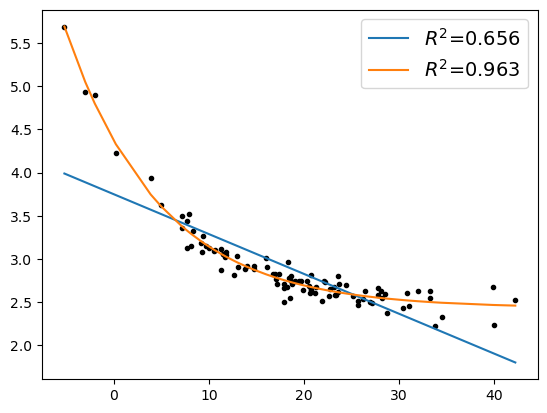

In [193]:
lbda = -0.1
x, y = DA
phi = np.exp(lbda*x)
DA2 = (phi,y)
thetahatA2 = compute_linear_regression(DA2)
RsquaredA2 = eval_Rsquared(thetahatA2,DA2)
print(RsquaredA2)

fig, ax = plt.subplots()
ax.scatter(DA[0],DA[1],color='k',marker='.')
ax.plot(DA[0],eval_linreg(thetahatA,DA),label='$R^2$={:.3f}'.format(RsquaredA))
ax.plot(DA[0],eval_linreg(thetahatA2,DA2),'-',label='$R^2$={:.3f}'.format(RsquaredA2))
ax.legend(fontsize=14)

# 12. Prediction uncertainty


Implement the function `compute_var_prediction(theta,D,gamma,xi)` that takes parameters $\hat\theta$, the dataset `D`, and a data sample $x_i$, and returns the variance in the prediction $\hat{y}_i$ corresponding to $x_i$.

In [203]:
def compute_var_prediction(thetahat,D,xi):
    x, y = D
    N = len(x)
    theta0, theta1 = thetahat
    
    # Calculate the residual variance sigma^2
    y_hat = eval_linreg(thetahat,D)
    sigma2 = estimate_sigma2(thetahat,D)
    
    # Calculate the variance of the prediction at xi
    x_mean = x.mean()
    varYA = sigma2 * ((1 / N) + ((xi - x_mean) ** 2) / np.sum((x - x_mean) ** 2))
    
    return varYA

In [204]:
varYA = compute_var_prediction(thetahatA,DA,DA[0])
stddevYA = np.sqrt(varYA)

varYB = compute_var_prediction(thetahatB,DB,DB[0])
stddevYB = np.sqrt(varYB)

varYC = compute_var_prediction(thetahatC,DC,DC[0])
stddevYC = np.sqrt(varYC)

varYD = compute_var_prediction(thetahatD,DD,DD[0])
stddevYD = np.sqrt(varYD)

print(f'stddevYA={stddevYA[:20:3]}')
print(f'stddevYB={stddevYB[:20:3]}')
print(f'stddevYC={stddevYC[:20:3]}')
print(f'stddevYD={stddevYD[:20:3]}')

stddevYA=[0.08643448 0.06966488 0.0498225  0.04820286 0.04679432 0.04424612
 0.0414014 ]
stddevYB=[0.08762327 0.08352081 0.08168098 0.07779715 0.07289334 0.07035215
 0.06925625]
stddevYC=[4.35776707 3.33866243 2.85387726 2.42265468 2.23691524 2.12253484
 1.95435833]
stddevYD=[1.05420215 0.72793851 0.65995923 0.55575209 0.49422517 0.47528383
 0.43187652]


In [205]:
grader.check("q12")

q12 results: All test cases passed!

# 13. Plot the prediction with uncertainty bounds

Repeat the scatter and prediction plot, but this time overlay an prediction uncertainty band of plus/minus two standard deviations. Your plot should look something like this:

<img src="resources/f3.png" />


Ellipsis

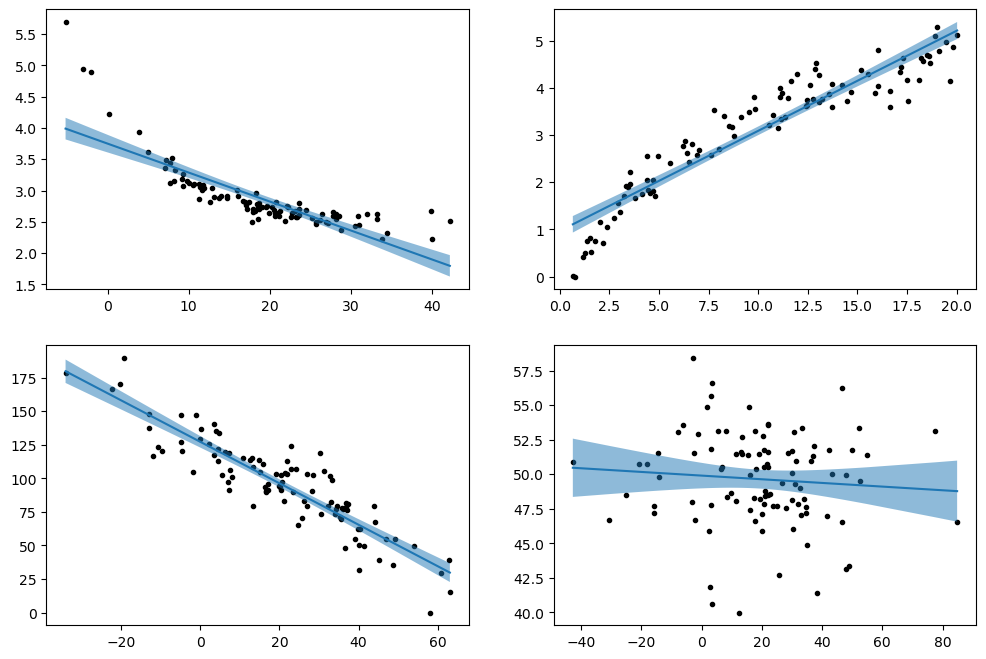

In [208]:
fig, ax = plt.subplots(figsize=(12,8),nrows=2,ncols=2)

a = ax[0,0]
yhatA = eval_linreg(thetahatA,DA)
a.scatter(DA[0],DA[1],color='k',marker='.')
a.plot(DA[0],yhatA)
a.fill_between(DA[0],yhatA-2*np.sqrt(varYA),yhatA+2*np.sqrt(varYA),alpha=0.5)

b = ax[0,1]
yhatA = eval_linreg(thetahatB,DB)
b.scatter(DB[0],DB[1],color='k',marker='.')
b.plot(DB[0],yhatB)
b.fill_between(DB[0],yhatB-2*np.sqrt(varYB),yhatB+2*np.sqrt(varYB),alpha=0.5)

c = ax[1,0]
yhatC = eval_linreg(thetahatC,DC)
c.scatter(DC[0],DC[1],color='k',marker='.')
c.plot(DC[0],yhatC)
c.fill_between(DC[0],yhatC-2*np.sqrt(varYC),yhatC+2*np.sqrt(varYC),alpha=0.5)

d = ax[1,1]
yhatD = eval_linreg(thetahatD,DD)
d.scatter(DD[0],DD[1],color='k',marker='.')
d.plot(DD[0],yhatD)
d.fill_between(DD[0],yhatD-2*np.sqrt(varYD),yhatD+2*np.sqrt(varYD),alpha=0.5)

...

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Make sure you submit the .zip file to Gradescope.

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)